In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
data = plt.imread('./Lab1.5_image.png')

# 4th dimension has 4 elements, where 4th is an alpha channel (always 255) - it can be removed
if data.shape[2] == 4:
    data = data[:, :, :3]

data.shape

(427, 640, 3)

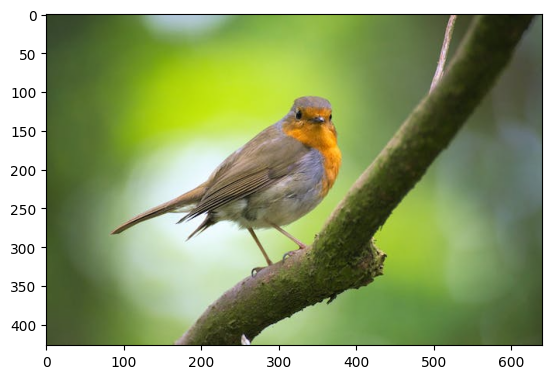

In [12]:
plt.imshow(data)

In [14]:
def generate_random_centroids(data, k_means = 3):

    random_location = [int(idx) for idx in np.random.rand(k_means)*data.shape[0]]
    random_centroids = data[random_location]

    return random_centroids


def kmeans(data, k_means, max_tries = 10, max_depth=1000):

    # list of losses per iteration
    iteration_loss = {}

    # j times running k-means
    for j in range(max_tries):

        interim_centroid = generate_random_centroids(data, k_means)

        #data row to cluster assignment
        assignments = np.array([])

        loss = []

        # i times - max steps to find optimal centroid
        for i in range(max_depth):

            idx_loss = 0
            assignment = []
            
            for point in data:

                distances = np.sum((point - interim_centroid)**2, axis=1)
                min_distance = np.argmin(distances)
                assignment.append(min_distance)
                idx_loss += np.sum((interim_centroid[min_distance] - point)**2, axis=0)

            if i > 0 and abs(idx_loss - loss[-1]) < 1 :
                break

            loss.append(idx_loss)

            assignments = np.array(assignment)

            # adjust centroids to new location (mean of all assignment)

            for idx in range(len(interim_centroid)):
                mean = data[assignments==idx]
                new_centroid = np.mean(mean, axis=0)
                interim_centroid[idx] = new_centroid

        iteration_loss[j] = [loss[-1], interim_centroid, assignments]

    return iteration_loss

In [16]:
kmeans(data, k_means=3)

IndexError: index 6 is out of bounds for axis 0 with size 3